In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# PCA
from sklearn.decomposition import PCA

# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

# Support Vector Machines
from sklearn.svm import SVC

# Cecition Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
_leukemia_dataset_file = '../Datasets/Leukemia_GSE9476.csv'
_rna_dataset_file = '../Datasets/METABRIC_RNA_Mutation.csv'

In [3]:
df = pd.read_csv(_leukemia_dataset_file)

In [4]:
df.shape

(64, 22285)

In [5]:
df.head(5)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [6]:
X = df[df.columns.drop('type')]

In [7]:
y = df['type']

In [159]:
x_axis = []
y_axis_dtc = []
y_axis_gnb = []
y_axis_etc = []
y_axis_rgc = []
y_axis_svc = []
y_axis_knn = []

for i in range(2, X.columns.size, 1000):
    x_axis.append(i)

    # Univariate Selection
    feature_extraction = SelectKBest(score_func=f_classif, k=i)
    fit = feature_extraction.fit(X, y)
    best_features = fit.transform(X)

    train, test, train_labels, test_labels = train_test_split(best_features, y, test_size=0.20, random_state=42)

    dtc = DecisionTreeClassifier()
    dtc = dtc.fit(train, train_labels)
    y_pred = dtc.predict(test)
    dtc_res = metrics.accuracy_score(test_labels, y_pred)
    y_axis_dtc.append(dtc_res) 

    gnb = GaussianNB()
    gnb = gnb.fit(train, train_labels)
    y_pred = gnb.predict(test)
    gnb_res = accuracy_score(test_labels, y_pred)
    y_axis_gnb.append(gnb_res)
    
    etc = ExtraTreesClassifier()
    etc.fit(train, train_labels)
    y_pred = etc.predict(test)
    etc_res = accuracy_score(test_labels, y_pred)
    y_axis_etc.append(etc_res)  
    
    rgc = LogisticRegression(solver='lbfgs', max_iter=1000)
    rgc.fit(train, train_labels)
    y_pred = rgc.predict(test)
    rgc_res = accuracy_score(test_labels, y_pred)
    y_axis_rgc.append(rgc_res)

    svc = SVC()
    svc.fit(train, train_labels)
    y_pred = svc.predict(test)
    svc_res = accuracy_score(test_labels, y_pred)
    y_axis_svc.append(svc_res)

    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(train, train_labels)
    y_pred = knn.predict(test)
    knn_res = accuracy_score(test_labels, y_pred)
    y_axis_knn.append(knn_res)

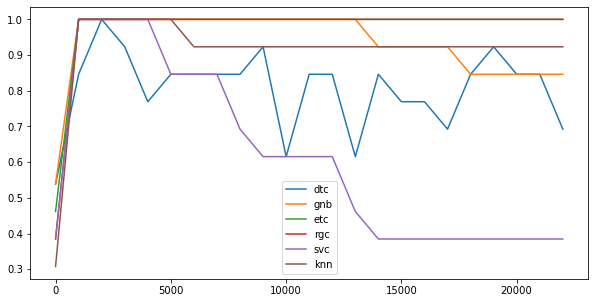

In [160]:
plt.figure(figsize=(20, 5))
plt.plot(x_axis, y_axis_dtc, label='dtc')
plt.plot(x_axis, y_axis_gnb, label='gnb')
plt.plot(x_axis, y_axis_etc, label='etc')
plt.plot(x_axis, y_axis_rgc, label='rgc')
plt.plot(x_axis, y_axis_svc, label='svc')
plt.plot(x_axis, y_axis_knn, label='knn')
plt.legend()
plt.show()

In [171]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [19]:
x_axis = []
# y_axis_rfe_dtc = []
# y_axis_rfe_gnb = []
# y_axis_rfe_etc = []
y_axis_rfe_rgc = []
# y_axis_rfe_svc = []
# y_axis_rfe_knn = []

for i in range(2, X.columns.size, 10000):
    x_axis.append(i)

    train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)

    # # RFE
    # rfe_dtc = RFE(DecisionTreeClassifier(), step=i)
    # rfe_dtc = rfe_dtc.fit(train, train_labels)
    # y_pred = rfe_dtc.predict(test)
    # rfe_dtc_res = accuracy_score(test_labels, y_pred)
    # y_axis_rfe_dtc.append(rfe_dtc_res)

    # # Throwing Error
    # rfe_gnb = RFE(GaussianNB(), step=i)
    # rfe_gnb = rfe_gnb.fit(train, train_labels)
    # y_pred = rfe_gnb.predict(test)
    # rfe_gnb_res = accuracy_score(test_labels, y_pred)
    # y_axis_rfe_gnb.append(rfe_gnb_res)
    
    # rfe_etc = RFE(ExtraTreesClassifier(), step=i)
    # rfe_etc.fit(train, train_labels)
    # y_pred = rfe_etc.predict(test)
    # rfe_etc_res = accuracy_score(test_labels, y_pred)
    # y_axis_rfe_etc.append(rfe_etc_res) 
    
    rfe_rgc = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), step=i)
    rfe_rgc.fit(train, train_labels)
    y_pred = rfe_rgc.predict(test)
    rfe_rgc_res = accuracy_score(test_labels, y_pred)
    y_axis_rfe_rgc.append(rfe_rgc_res)

    # # Throwing Error
    # rfe_svc = RFE(SVC(), step=i)
    # rfe_svc.fit(train, train_labels)
    # y_pred = rfe_svc.predict(test)
    # rfe_svc_res = accuracy_score(test_labels, y_pred)
    # y_axis_rfe_svc.append(rfe_svc_res)

    # # Throwing Error
    # rfe_knn = RFE(KNeighborsClassifier(n_neighbors=4), step=10)
    # rfe_knn.fit(train, train_labels)
    # y_pred = rfe_knn.predict(test)
    # rfe_knn_res = accuracy_score(test_labels, y_pred)
    # y_axis_rfe_knn.append(rfe_knn_res)

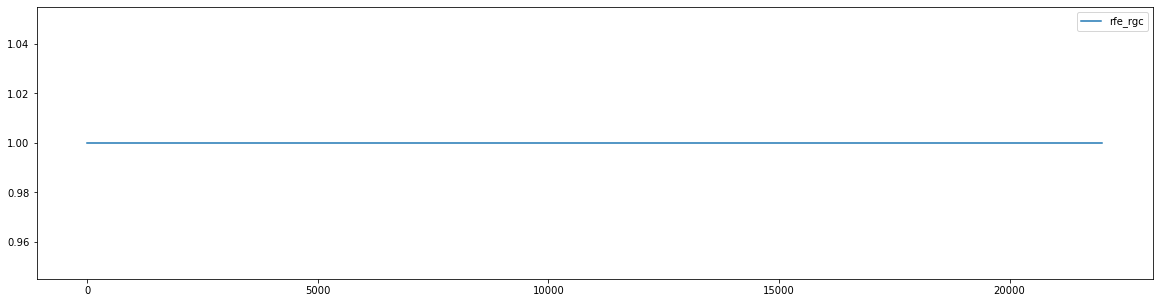

In [ ]:
plt.figure(figsize=(20, 5))
# plt.plot(x_axis, y_axis_rfe_dtc, label='rfe_dtc')
# plt.plot(x_axis, y_axis_rfe_gnb, label='rfe_gnb')
# plt.plot(x_axis, y_axis_rfe_etc, label='rfe_etc')
plt.plot(x_axis, y_axis_rfe_rgc, label='rfe_rgc')
plt.legend()
plt.show()

In [ ]:
# x_axis = []
# y_axis = []
# train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)
# for i in range(1, train.shape[0], 1):
#     # PCA
#     pca = PCA(n_components=i)
#     fit = pca.fit(train)
#     best_features = fit.transform(train)

#     model = DecisionTreeClassifier()
#     model = model.fit(train, train_labels)
#     y_pred = model.predict(test)
#     res = metrics.accuracy_score(test_labels, y_pred)

#     x_axis.append(i)
#     y_axis.append(res)
    

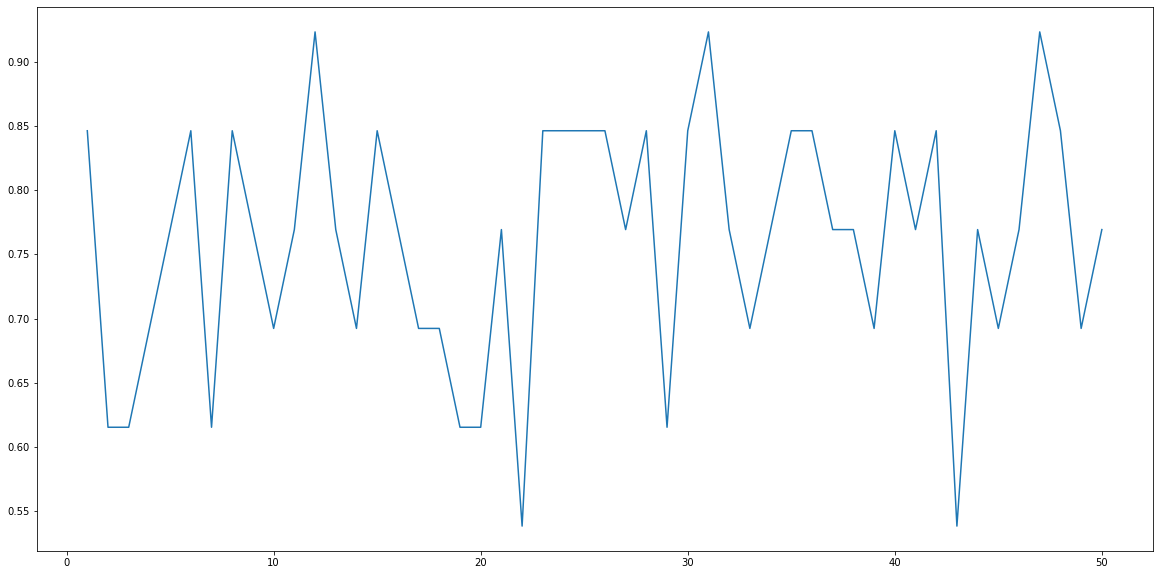

In [ ]:
# plt.figure(figsize=(20, 10))
# plt.plot(x_axis, y_axis)
# plt.show()